**Exercise 1: Working with images**

*CPSC 480/580: Computer Vision*

*Yale University*

*Instructor: Alex Wong*


**Prerequisites**:

1. Enable Google Colaboratory as an app on your Google Drive account

2. Create a new Google Colab notebook, this will also create a "Colab Notebooks" directory under "MyDrive" i.e.
```
/content/drive/MyDrive/Colab Notebooks
```

3. Create the following directory structure in your Google Drive
```
/content/drive/MyDrive/Colab Notebooks/CPSC 480-580: Computer Vision/Exercises
```

4. Move the 01_exercise.ipynb into
```
/content/drive/MyDrive/Colab Notebooks/CPSC 480-580: Computer Vision/Exercises
```
so that its absolute path is
```
/content/drive/MyDrive/Colab Notebooks/CPSC 480-580: Computer Vision/Exercises/01_exercise.ipynb
```

In this exercise, we will introduce basic data handling for loading and visualizing images. We will implement a training and validation loop for a Perceptron and test it on the testing split.


**Submission**:

1. Implement all TODOs in the code blocks below.

2. Run the Colab Notebook to produce results for each code block.

3. List any collaborators.

```
Collaborators: Doe, Jane (Please write names in <Last Name, First Name> format)

Collaboration details: Discussed ... implementation details with Jane Doe.
```

Import packages

In [2]:
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np

Utility functions for plotting

In [30]:
def config_plot(ax):
    '''
    Function to remove axis tickers and box around figure
    '''

    # TODO: Implement axis tickers and box removal
    if isinstance(ax, (list, tuple, np.ndarray)):
        for a in ax:
            a.axis('off')
    else:
        ax.axis('off')

Visualize image of coffee

Shape of coffee image: (400, 600, 3)
Min and max values of coffee image: (0, 255)


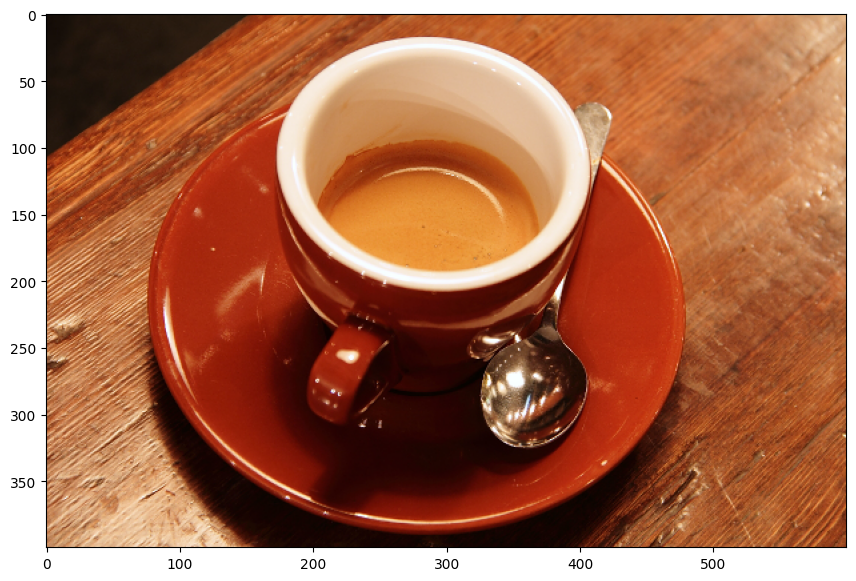

In [35]:
# TODO: Load coffee image from skimage
image_coffee = ski.data.coffee()

# TODO: Print image shape/dimension
print('Shape of coffee image: {}'.format(image_coffee.shape))

# TODO: Print min and max value of the image using numpy
print('Min and max values of coffee image: {}'.format(
    (int(np.min(image_coffee)), int(np.max(image_coffee)))))

# TODO: Create visualization of coffee image with figure size of 8x8
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(image_coffee)

plt.show()

Visualize image of text without axis tickers

Shape of coffee image: (172, 448)


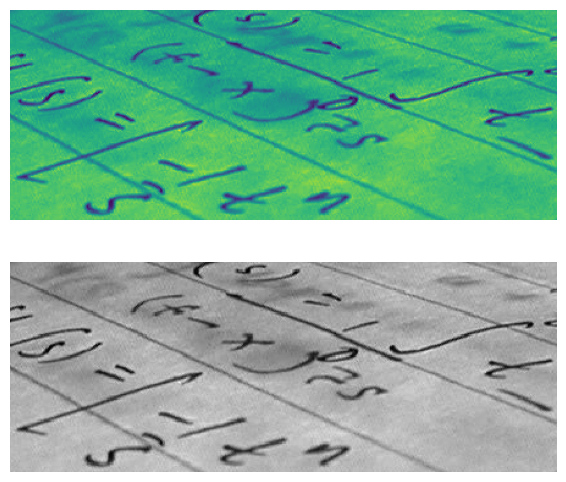

In [ ]:
# TODO: Load text image
image_text = ski.data.text()

# TODO: Print image shape/dimension
print('Shape of text image: {}'.format(image_text.shape))

# TODO: Create visualization with figure size of 24x6 with 2 subplots
fig, (plt1, plt2) = plt.subplots(2, figsize=(24, 6))

# TODO: Display the image in the first subplot
plt1.imshow(image_text)

# Note: must use config_plot for full points
two_plots = [plt1, plt2]
config_plot(two_plots)

# TODO: Display the image using grayscale colormap in second subplot
plt2.imshow(image_text, cmap='gray')

plt.show()

Visualize MRI volume of brain as grayscale images along the channel dimension

Shape of MRI volume of brain: (10, 256, 256)
Min and max values of MRI volume: (0, 51076)


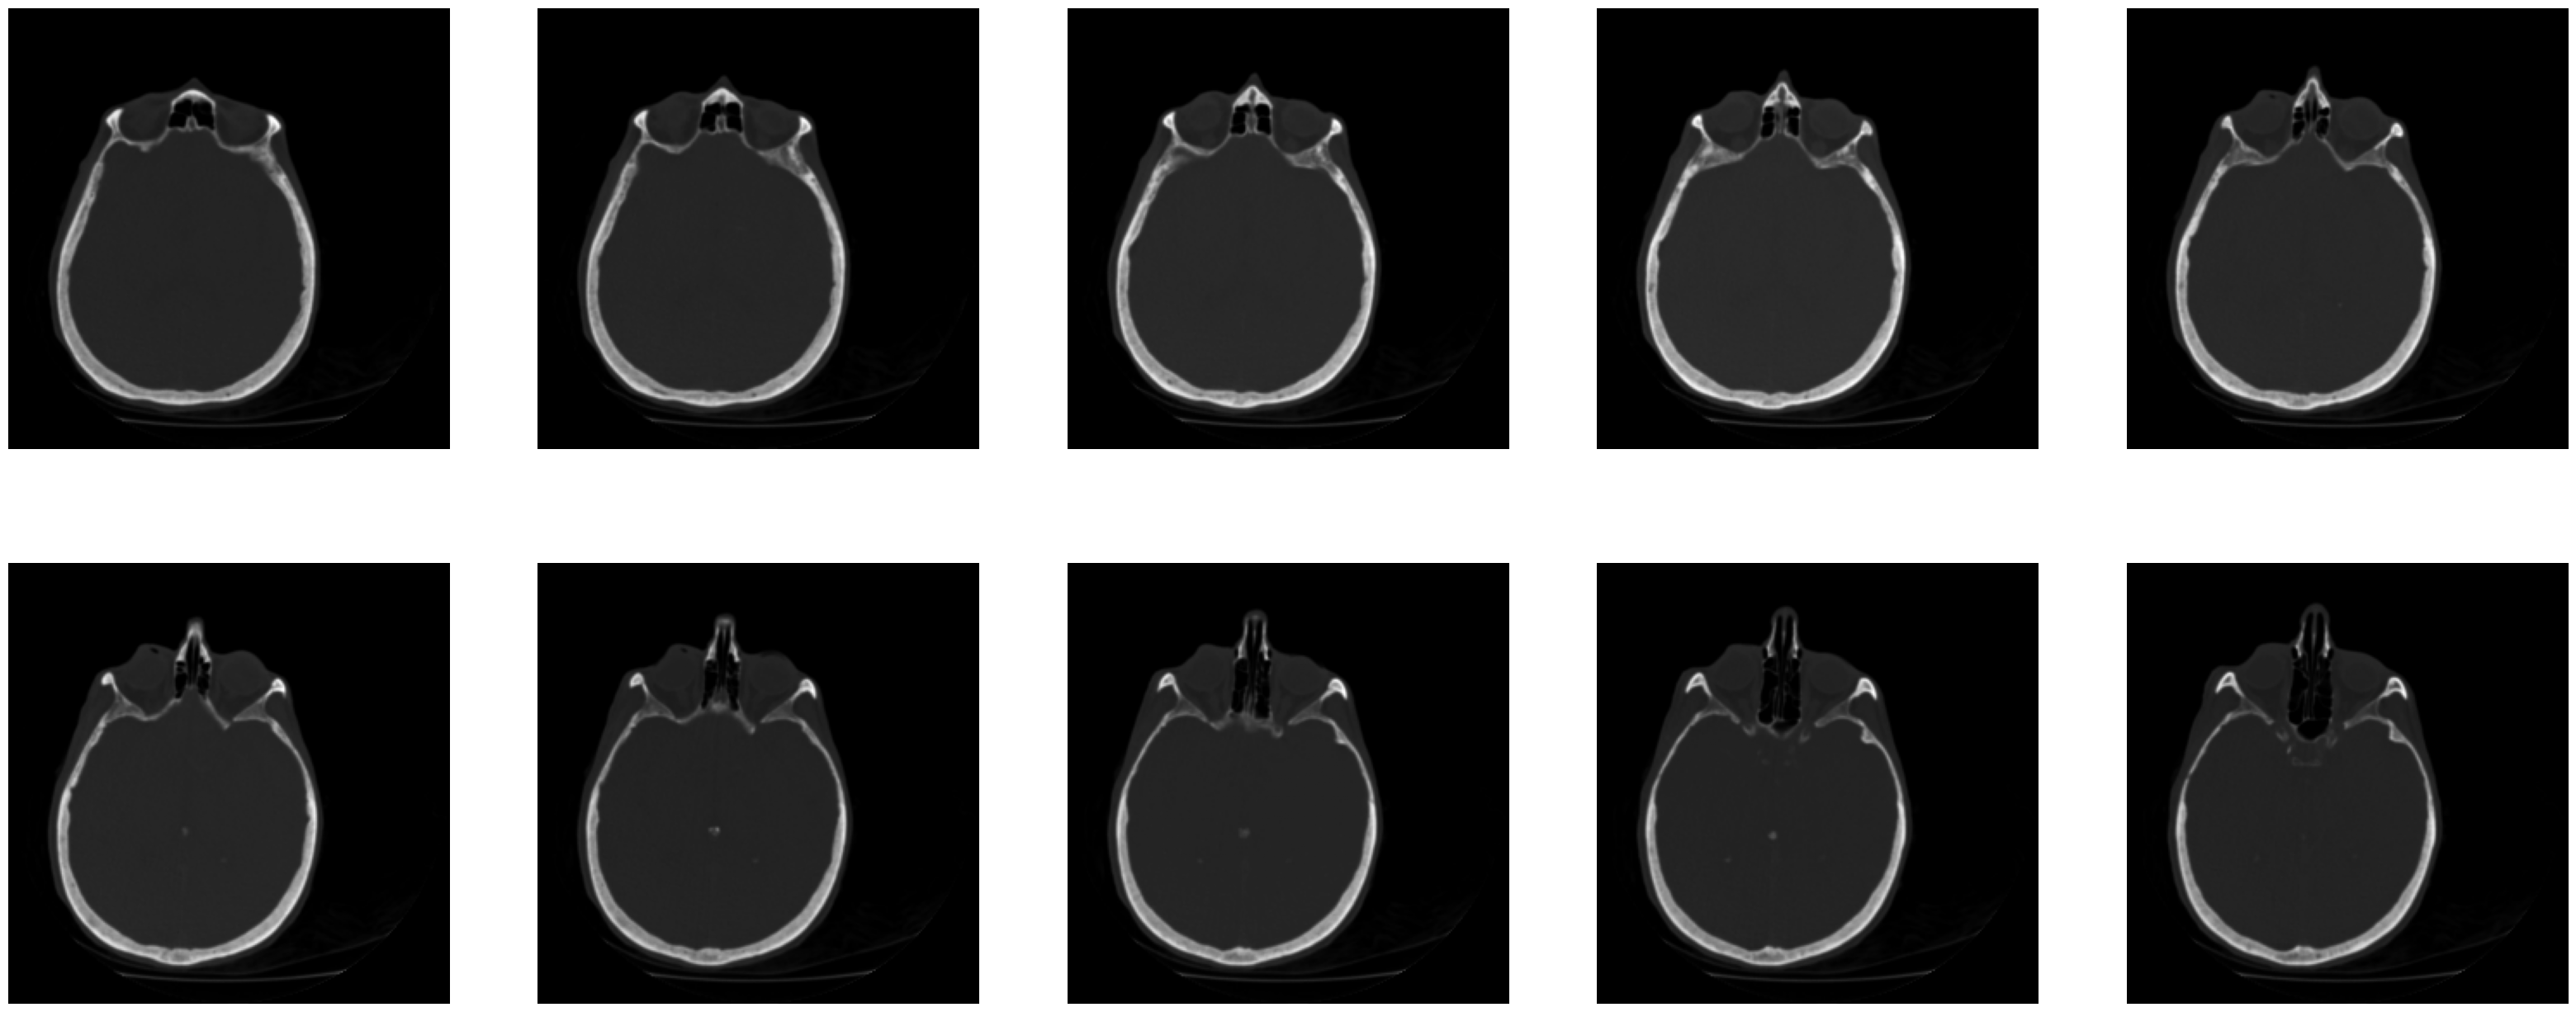

In [36]:
# TODO: Load MRI volume of brain
mri_brain = ski.data.brain()

# TODO: Print MRI volume shape/dimension
print('Shape of MRI volume of brain: {}'.format(mri_brain.shape))

# TODO: Print min and max value of the image
print('Min and max values of MRI volume: {}'.format((int(mri_brain.min()), int(mri_brain.max()))))

# TODO: Create a 2x5 grid visualization with figure size of 40x16
fig, plts = plt.subplots(2, 5, figsize=(40, 16))

# TODO: Iterate over the MRI volume and display each slice (image) using grayscale colormap
for i, image_slice in enumerate(mri_brain):
    row = i // 5  # integer division gives the row
    col = i % 5   # modulo gives the column
    plts[row, col].imshow(image_slice, cmap='gray')

config_plot(plts.flatten()) # 2D NumPy array --> expects 1D arr

plt.show()


Visualize the full and 80% center crop of Chelsea

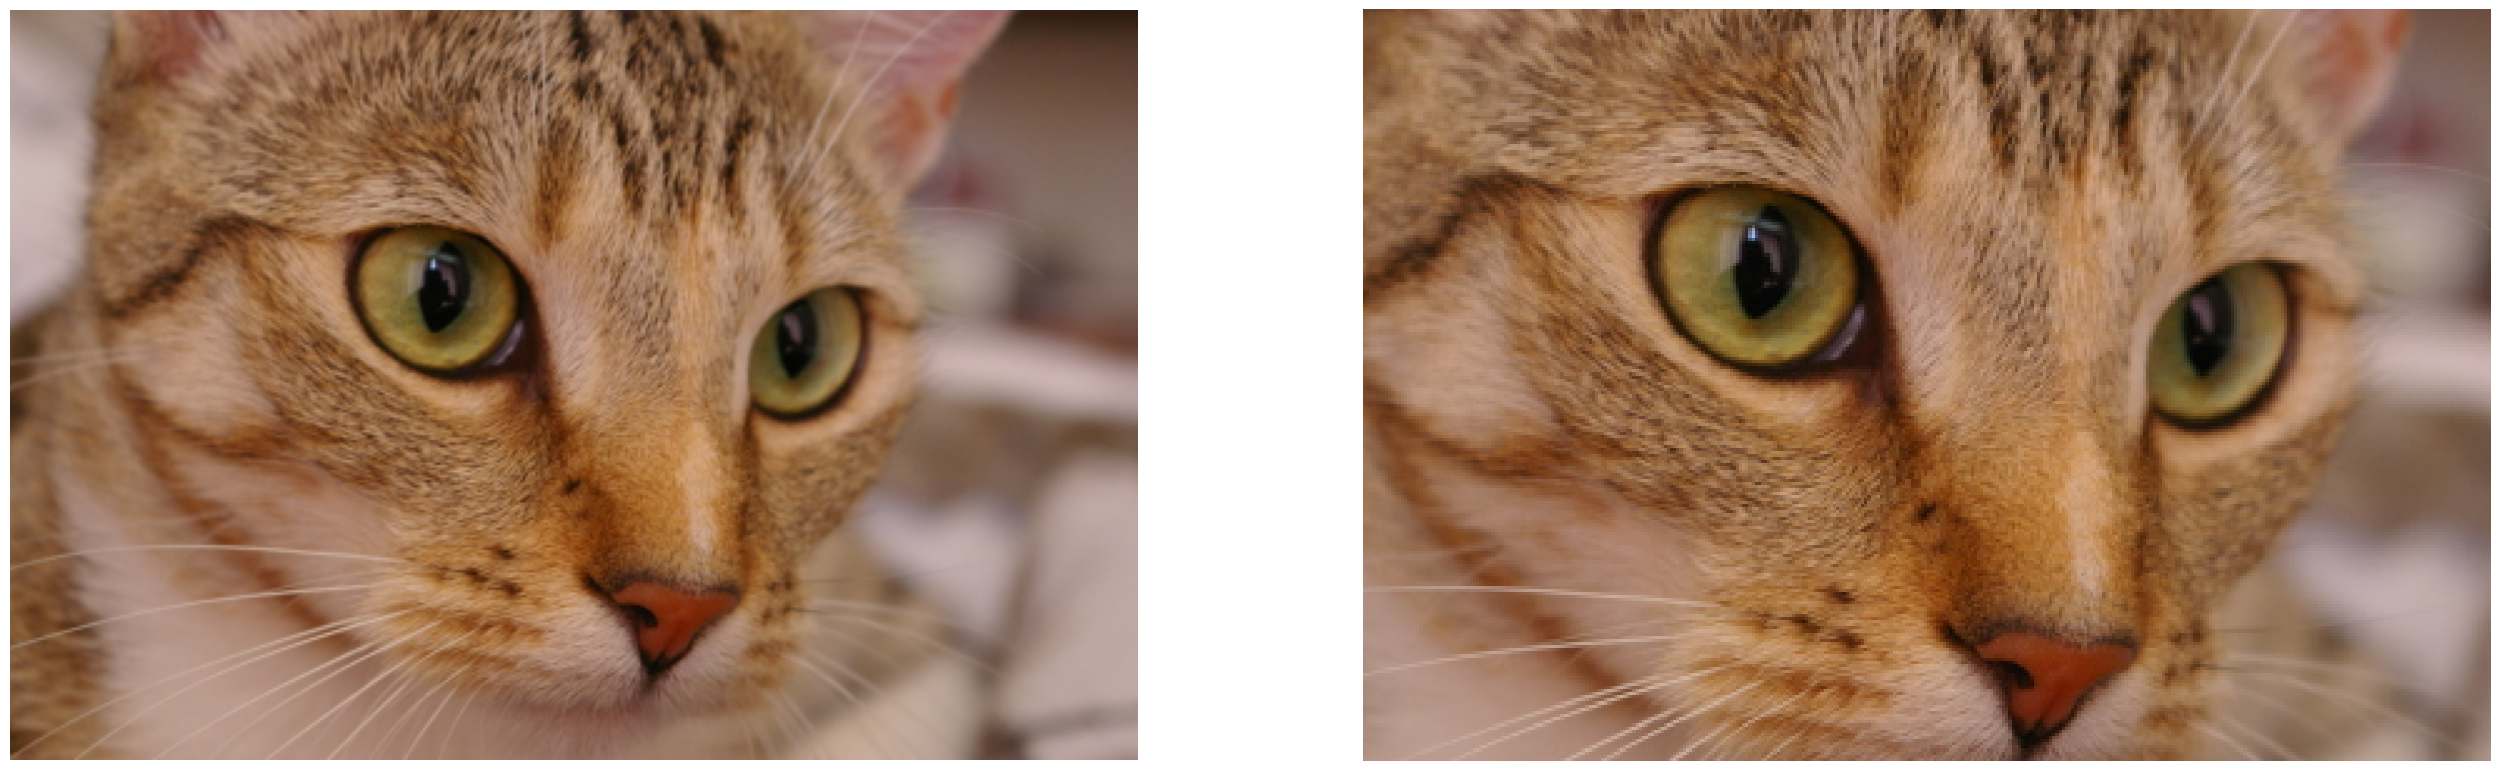

In [39]:
# TODO: Load Chelsea image
image_chelsea = ski.data.chelsea()

# TODO: Compute start and end crop locations for x and y directions for 80%
# shape() -> (height, width, channel)
height, width = image_chelsea.shape[:2]
crop_height, crop_width = int(height * 0.80), int(width * 0.80)

# imagine a 100 x 100 square
crop_y_start = (height - crop_height) // 2
crop_y_end = crop_height + crop_y_start
crop_x_start = (width - crop_width) // 2
crop_x_end = crop_width + crop_x_start

# TODO: Perform 80% center crop on Chelsea image
# order is (rows, cols, channel)
image_chelsea_crop = image_chelsea[crop_y_start:crop_y_end, crop_x_start:crop_x_end, :]

# TODO: Create a 1x2 grid visualization with figure size of 32x24
fig, (plt1, plt2) = plt.subplots(1, 2, figsize = (32, 24))
config_plot([plt1, plt2])

plt1.imshow(image_chelsea)
plt2.imshow(image_chelsea_crop)
plt.show()

Shifting and resizing a grayscale Astronaut

In [21]:
def resample_from_image(image_src, image_tgt, xy_src, xy_tgt):
    '''
    Resample target image from source image

    TODO: Refactor resampling code into this function and use it below

    Arg(s):
        image_src : numpy[float32] --> original grayscale image
            H x W image
        image_tgt : numpy[float32] --> image of blank zeros
            h x w image to be populated
        xy_src : numpy[float32] --> array of index pixel corresponding to pixel coords
            N x 2 coordinates corresponding to source image
        xy_tgt : numpy[float32]
            N x 2 coordinates corresponding to target image
    Returns:
        numpy[float32] : resampled image
    '''

    # TODO: Get height and width of image
    n_height, n_width = image_src.shape[:2]
    n_t_height, n_t_width = image_tgt.shape[:2]

    # TODO: Iterate through each coordinate and resample from the original image
    # Begin by looping through the src coordinates
    for i in range(xy_src.shape[0]):
        x_s, y_s = xy_src[i]
        x_t, y_t = xy_tgt[i]

        xs = int(round(x_s))
        ys = int(round(y_s))
        xt = int(round(x_t))
        yt = int(round(y_t))

        # height x width (y, x) order
        if 0 <= ys < n_height and 0 <= xs < n_width and 0 <= yt < n_t_height and 0 <= xt < n_t_width:
            image_tgt[yt, xt] = image_src[ys, xs]

    return image_tgt


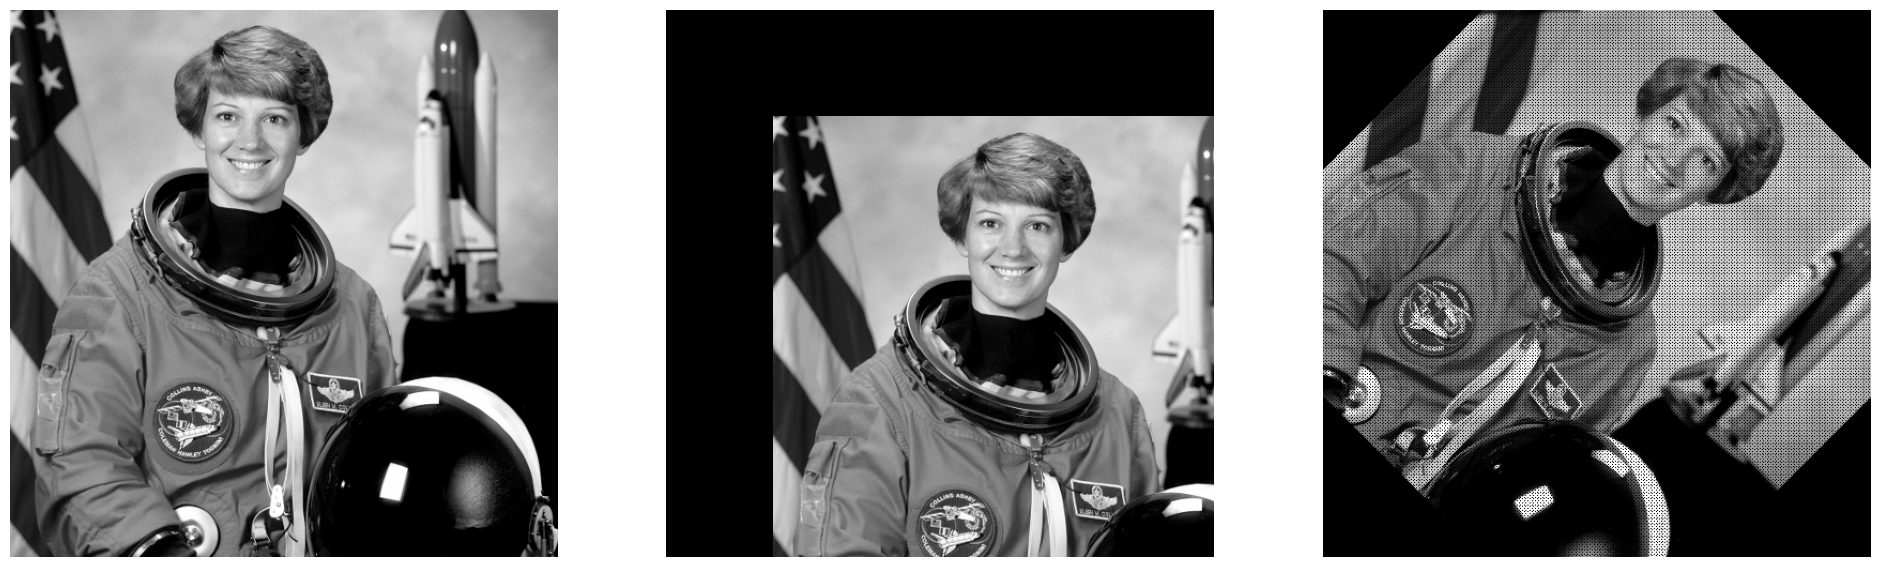

In [ ]:
# TODO: Load astronaunt image
image_astronaunt = ski.data.astronaut()

# TODO: Convert astronaunt image to gray
image_astronaunt = ski.color.rgb2gray(image_astronaunt)
n_height, n_width = image_astronaunt.shape[0], image_astronaunt.shape[1]

# TODO: Define a coordinate plane (meshgrid) with the same size as the image
x_grid, y_grid = np.meshgrid(np.arange(n_width), np.arange(n_height))
x = x_grid.flatten()
y = y_grid.flatten()

# TODO: Stack x and y coordinates together
xy_grid = np.vstack((x, y))

# TODO: Convert the coordinates to homogeneous form and reshape to 3 x N points
# --> this is oriented from the top left of the grid however
xy_h = np.vstack((x, y, np.ones_like(x)))

# TODO: Shift the origin to the center of the image
# --> shift coords by (-W/2, -H/2)
x_offset = n_width / 2
y_offset = n_height / 2

xy_h_centered = np.vstack((x - x_offset, y - y_offset, np.ones_like(x)))

# TODO: Define a translation matrix by 100 pixels to the right and 100 pixels upward
translation_matrix = np.array([[1, 0, 100],
                               [0, 1, 100],
                               [0, 0, 1]])

# TODO: Transform the coordinates with translation matrix
xy_h_translated = np.dot(translation_matrix, xy_h_centered)

# TODO: Shift the origin of the shifted coordinates back to top left corner
translation_matrix_back = np.array([[1, 0, x_offset],
                               [0, 1, y_offset],
                               [0, 0, 1]])
xy_h_translated = np.dot(translation_matrix_back, xy_h_translated)

# TODO: Convert coordinates back to inhomogenous form
# We can do this since the augmented row is just 1
xy_translated = np.delete(xy_h_translated, 2, axis=0)

# TODO: Define new image of 0s
image_astronaunt_translated = np.zeros((n_height, n_width), dtype=image_astronaunt.dtype)

# TODO: Iterate through each coordinate and resample from the original image
# Note: for full points, must implement and use resample_from_image
# what are we doing here?: we are essentially painting the translated image (put into target)
# also note: we have to transpose to meet N x 2
# print('xy_grid: ', xy_grid.T)
# print('xy_translated: ', xy_translated.T)
resample_from_image(image_astronaunt, image_astronaunt_translated, xy_grid.T, xy_translated.T)

# TODO: Define rotation matrix of 45 degrees
theta = np.deg2rad(45)
rotation_matrix = np.array([
                            [np.cos(theta), -np.sin(theta), 0],
                           [np.sin(theta), np.cos(theta), 0],
                           [0, 0, 1]
                           ])

# TODO: Transform the coordinates with rotation matrix
xy_h_rotated = np.dot(rotation_matrix, xy_h_centered)

# TODO: Shift the origin of the shifted coordinates back to top left corner
rotated_translated = np.dot(translation_matrix_back, xy_h_rotated)

# TODO: Convert coordinates back to inhomogenous form
xy_rotated = np.delete(rotated_translated, 2, axis=0)

# TODO: Define new image of 0s
image_astronaunt_rotated = np.zeros((n_height, n_width), dtype=image_astronaunt.dtype)

# TODO: Iterate through each coordinate and resample from the original image
# Note: for full points, must implement and use resample_from_image
resample_from_image(image_astronaunt, image_astronaunt_rotated, xy_grid.T, xy_rotated.T)

# TODO: Create a 1x3 grid visualization with figure size of 24x32
fig, plts = plt.subplots(1, 3, figsize=(24, 32))
config_plot(plts.flatten())

# TODO: Display grayscale image in the first subplot
ax = plts[0].imshow(image_astronaunt, cmap='gray')

# TODO: Display translated grayscale image in the second subplot
ax = plts[1].imshow(image_astronaunt_translated, cmap='gray')

# TODO: Display rotated grayscale image in the third subplot
ax = plts[2].imshow(image_astronaunt_rotated, cmap='gray')

plt.show()